# Elementi della teoria dell'informazione {#sec-information-theory}

**Preparazione del Notebook**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy as sc
import statistics as st
import arviz as az
import pingouin as pg
import warnings
warnings.filterwarnings("ignore")

In [3]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "information_theory"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Che cos'è l'Informazione?

La capacità di separare il segnale dal rumore, di estrarre informazioni dai dati, è cruciale.

L'informazione è solitamente misurata in bit, e un bit di informazione permette di scegliere tra due alternative ugualmente probabili. La parola bit deriva da binary digit (cioè uno zero o un uno).

Per capire come l'informazione possa essere misurata in bit, consideriamo il seguente esempio discusso da @stone2022information. Immagina di essere in piedi all'incrocio in punto A nell'immagine seguente e di voler raggiungere il punto segnato D011. 

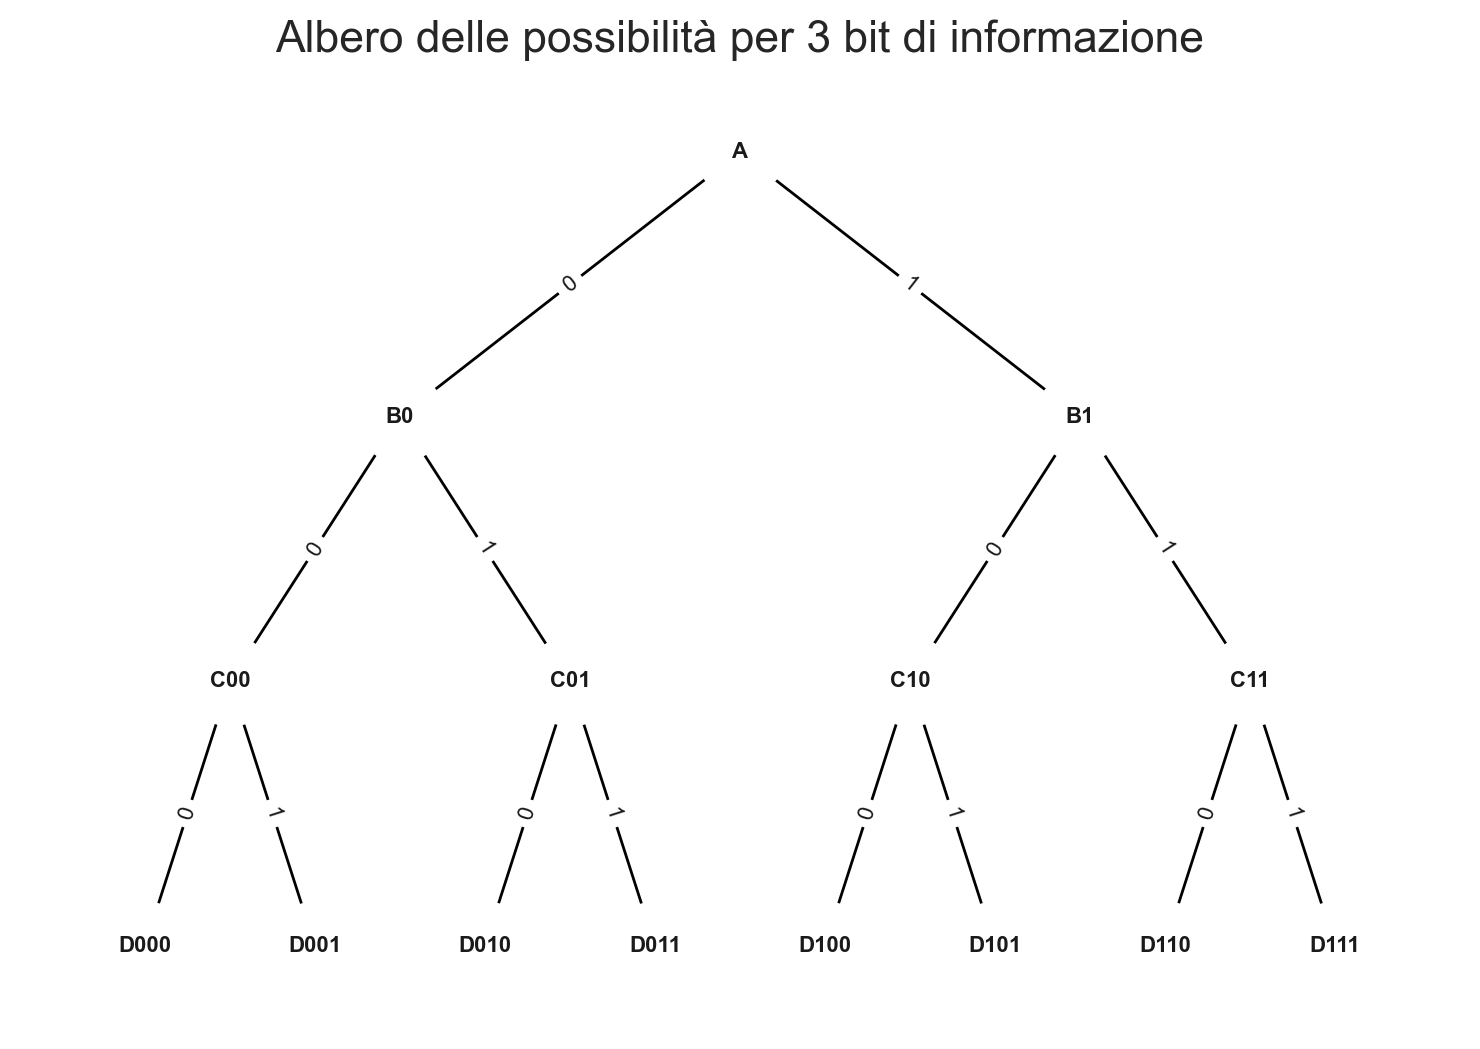

In [8]:
# Crea un grafo diretto
G = nx.DiGraph()

# Aggiungi i nodi e archi per l'albero binario a 3 livelli
edges = [
    ("A", "B0", "0"),
    ("A", "B1", "1"),
    ("B0", "C00", "0"),
    ("B0", "C01", "1"),
    ("B1", "C10", "0"),
    ("B1", "C11", "1"),
    ("C00", "D000", "0"),
    ("C00", "D001", "1"),
    ("C01", "D010", "0"),
    ("C01", "D011", "1"),
    ("C10", "D100", "0"),
    ("C10", "D101", "1"),
    ("C11", "D110", "0"),
    ("C11", "D111", "1"),
]

# Aggiungi gli archi con etichette
for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Posizionamento dei nodi per una visualizzazione ad albero
pos = {
    "A": (0, 0),
    "B0": (-2, -1),
    "B1": (2, -1),
    "C00": (-3, -2),
    "C01": (-1, -2),
    "C10": (1, -2),
    "C11": (3, -2),
    "D000": (-3.5, -3),
    "D001": (-2.5, -3),
    "D010": (-1.5, -3),
    "D011": (-0.5, -3),
    "D100": (0.5, -3),
    "D101": (1.5, -3),
    "D110": (2.5, -3),
    "D111": (3.5, -3),
}

# Disegna il grafo
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=1000,
    node_color="white",
    font_size=8,
    font_weight="bold",
    edge_color="black",
    arrows=False,
)

# Aggiungi le etichette degli archi (0 o 1)
edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Mostra il grafo
plt.title("Albero delle possibilità per 3 bit di informazione")
plt.show()

Nota che questa figura rappresenta una vista dall'alto, che non hai; tutto ciò che hai è un bivio davanti a te e una decisione da prendere. Se non hai alcuna informazione preventiva su quale strada scegliere, il bivio in A fornisce due alternative ugualmente plausibili. Se ti dico di andare a sinistra, hai ricevuto un bit di informazione. Se rappresentiamo la mia istruzione con una cifra binaria (0=sinistra e 1=destra), questa cifra binaria ti fornisce un bit di informazione, che ti indica quale strada scegliere.

Ora immagina di passeggiare lungo la strada e di arrivare a un altro bivio, al punto B. Anche in questo caso, poiché non hai idea di quale strada scegliere, una cifra binaria (1=destra) fornisce un bit di informazione, permettendoti di scegliere la strada giusta, che porta al punto segnato C. Una terza cifra binaria (1=destra) ti fornisce un altro bit di informazione, che ti permette di scegliere nuovamente la strada giusta, portandoti al punto segnato D011.

Ci sono ora otto strade tra cui puoi scegliere quando parti da A, quindi tre cifre binarie (che ti forniscono tre bit di informazione) ti permettono di scegliere tra otto alternative ugualmente plausibili; 8 corrisponde a $2 \cdot 2 \cdot 2 = 2^3 = 8$.

Riassumiamo il tuo viaggio in termini di numero di alternative ugualmente probabili:

- Se hai 1 bit di informazione, puoi scegliere tra 2 alternative ugualmente probabili (ovvero $2^1 = 2$).
- Se hai 2 bit di informazione, puoi scegliere tra 4 alternative ugualmente probabili (ovvero $2^2 = 4$).
- Se hai 3 bit di informazione, puoi scegliere tra 8 alternative ugualmente probabili (ovvero $2^3 = 8$).

Possiamo riformulare questo in termini più generali se usiamo $n$ per rappresentare il numero di incroci e $m$ per rappresentare il numero di destinazioni finali. Se sei arrivato a $n$ incroci, hai effettivamente scelto tra

$$
m = 2^n \text{ destinazioni finali}.
$$

La complessità di questo viaggio può essere rappresentata sia come il numero ($m$) di possibili destinazioni finali sia come il numero ($n$) di incroci che devono essere attraversati per raggiungere una data destinazione. Se ci sono $m = 8$ possibili destinazioni, quanti incroci $n$ questo implica? In altre parole, date otto destinazioni, quale potenza di 2 è necessaria per ottenere 8? In questo caso, sappiamo che la risposta è $n=3$, ovvero il logaritmo in base 2 di 8. Quindi, $3=\log_2 8$ è il numero di incroci implicato da otto destinazioni.

In generale, il logaritmo di $m$ è la potenza a cui 2 deve essere elevato per ottenere $m$; cioè, $m = 2^n$. Equivalentemente, dato un numero $m$ che vogliamo esprimere come logaritmo,

$$
n = \log_2 m. 
$$

Il pedice 2 indica che stiamo usando logaritmi in base 2.

In termini di logaritmi, possiamo riassumere il viaggio da un altro punto di vista, ovvero in termini di bit:

- Se devi scegliere tra 2 alternative ugualmente probabili (ovvero $2^1$) hai bisogno di $1(= \log_2 2^1 = \log_2 2)$ bit di informazione.
- Se devi scegliere tra 4 alternative ugualmente probabili (ovvero $2^2$) hai bisogno di $2(= \log_2 2^2 = \log_2 4)$ bit di informazione.
- Se devi scegliere tra 8 alternative ugualmente probabili (ovvero $2^3$) hai bisogno di $3(= \log_2 2^3 = \log_2 8)$ bit di informazione.

In generale, se devi scegliere tra $m$ alternative ugualmente probabili, hai bisogno di 

$$
n = \log_2 m 
$$

bit di informazione.

In sintesi, se hai $n$ bit di informazione puoi scegliere tra $m = 2^n$ alternative ugualmente probabili. Equivalentemente, se devi scegliere tra $m$ alternative ugualmente probabili, hai bisogno di $n = \log_2 m$ bit di informazione. Detto in altri termini, per arrivare a $D$ partendo da $A$, sono dunque necessarie 3 domande la cui risposta binaria è destra/sinistra.